# Mooring Synthesis of Initial NC data (offline)

## 20BSP-14A

- from netcdf files
- plot all depths of each parameter on each other for comparative purposes
- Temperature, Salinity, Pressure in this notebook.  See companion for Oxygen, Chlor, ADCP/currents, etc

In [1]:
import xarray as xa
import pandas as pd
import numpy as np
import cmocean

In [2]:
#wrap the plot in image settings for visual appeal
# may be able to make this cleaner or just a preset
%run '../../settings/mpl_plot_settings.py'

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


/Users/bell/Programs/ECOFOCI_Processing_Archive/settings/mpl_plot_settings.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


In [3]:
ncfiles = '/Users/bell/ecoraid/2020/Moorings/20bsp14a/final_data_cf/*vel*.nc'

mfd_adcp = xa.open_mfdataset(ncfiles)
mfd_adcp

<xarray.Dataset>
Dimensions:          (time: 34591, depth: 15, latitude: 1, longitude: 1)
Coordinates:
  * time             (time) datetime64[ns] 2020-09-18T08:00:00 ... 2022-09-08...
  * depth            (depth) float64 -0.0 2.0 4.0 6.0 ... 22.0 24.0 26.0 28.0
  * latitude         (latitude) float64 64.0
  * longitude        (longitude) float64 -167.9
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 dask.array<chunksize=(1, 1, 34591, 15), meta=np.ndarray>
    v_curr_comp      (latitude, longitude, time, depth) float64 dask.array<chunksize=(1, 1, 34591, 15), meta=np.ndarray>
    w_curr_comp      (latitude, longitude, time, depth) float64 dask.array<chunksize=(1, 1, 34591, 15), meta=np.ndarray>
    w_curr_comp_err  (latitude, longitude, time, depth) float64 dask.array<chunksize=(1, 1, 34591, 15), meta=np.ndarray>
    agc1             (latitude, longitude, time, depth) float64 dask.array<chunksize=(1, 1, 34591, 15), meta=np.ndarray>
    agc2             (latitude, longitude, time, depth) float64 dask.array<chunksize=(1, 1, 34591, 15), meta=np.ndarray>
    agc3             (latitude, longitude, time, depth) float64 dask.array<chunksize=(1, 1, 34591, 15), meta=np.ndarray>
    agc4             (latitude, longitude, time, depth) float64 dask.array<chunksize=(1, 1, 34591, 15), meta=np.ndarray>
Attributes: (12/13)
    Latitude_DegMMddW:                      64 00.156 N
    Longitude_DegMMddN:                     167 56.043 W
    MooringID:                              20BSP-14A
    platform_deployment_date:               2020-09-18T07:37:00Z
    platform_deployment_cruise_name:        DY2012
    platform_recovery_date:                 2022-09-08T23:00:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  
    WaterDepth:                             38.1
    date_created:                           2023-01-06T06:25:04Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.  removed U...

In [4]:
ncfiles = '/Users/bell/ecoraid/2020/Moorings/20bsp14a/final_data_cf/*sg*.nc'

mfd = xa.open_mfdataset(ncfiles)
mfd

<xarray.Dataset>
Dimensions:          (time: 20081, latitude: 1, longitude: 1, depth: 1)
Coordinates:
  * time             (time) datetime64[ns] 2020-09-18T08:00:00 ... 2021-11-10...
  * latitude         (latitude) float64 64.0
  * longitude        (longitude) float64 -167.9
  * depth            (depth) float64 33.0
Data variables:
    current_speed    (time, depth, latitude, longitude) float64 dask.array<chunksize=(20081, 1, 1, 1), meta=np.ndarray>
    v_curr_comp      (time, depth, latitude, longitude) float64 dask.array<chunksize=(20081, 1, 1, 1), meta=np.ndarray>
    u_curr_comp      (time, depth, latitude, longitude) float64 dask.array<chunksize=(20081, 1, 1, 1), meta=np.ndarray>
    temperature      (time, depth, latitude, longitude) float64 dask.array<chunksize=(20081, 1, 1, 1), meta=np.ndarray>
    oxy_percentsat   (time, depth, latitude, longitude) float64 dask.array<chunksize=(20081, 1, 1, 1), meta=np.ndarray>
    oxy_temperature  (time, depth, latitude, longitude) float64 dask.array<chunksize=(20081, 1, 1, 1), meta=np.ndarray>
    oxy_conc         (time, depth, latitude, longitude) float64 dask.array<chunksize=(20081, 1, 1, 1), meta=np.ndarray>
Attributes: (12/13)
    Latitude_DegMMddW:                      64 00.156 N
    Longitude_DegMMddN:                     167 56.043 W
    MooringID:                              20BSP-14A
    platform_deployment_date:               2020-09-18T07:37:00Z
    platform_deployment_cruise_name:        DY2012
    platform_recovery_date:                 2022-09-08T23:00:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  
    WaterDepth:                             38.1
    date_created:                           2023-01-06T06:10:25Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Declination Correction = 7.702807...

## Compare Currents across two instruments

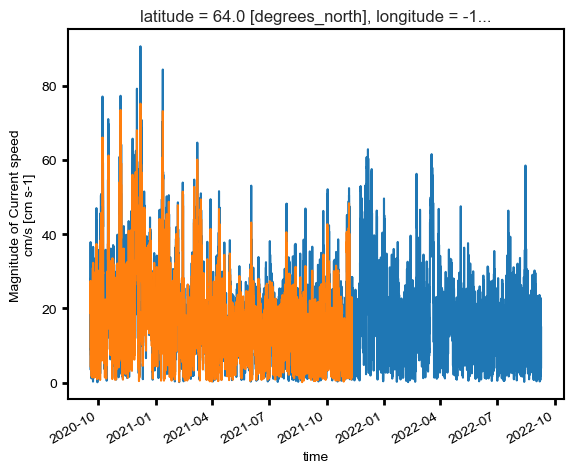

In [5]:
np.sqrt((mfd_adcp.sel({'depth':33},method='nearest').u_curr_comp)**2 + (mfd_adcp.sel({'depth':33},method='nearest').v_curr_comp)**2).plot()
mfd.current_speed.plot()


# Compare Temperature

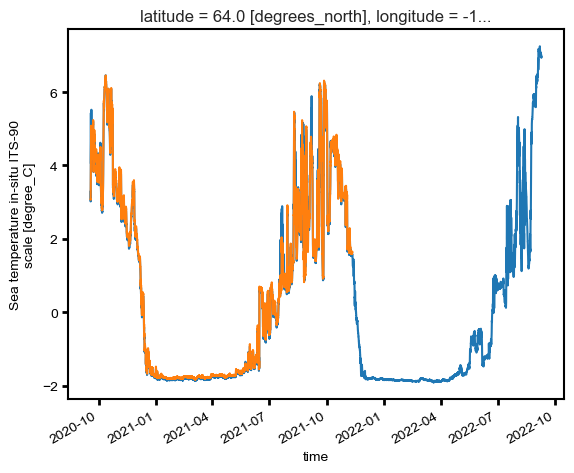

In [8]:
ncfiles = '/Users/bell/ecoraid/2020/Moorings/20bsp14a/final_data_cf/*scal*.nc'

mfd_adcp_scal = xa.open_mfdataset(ncfiles)
mfd_adcp_scal

mfd_adcp_scal.temperature.plot()
mfd.temperature.plot()
